In [14]:
import pandas as pd
import numpy as np
import pytz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
# reading the tables
wind_actual_2018_5min = pd.read_csv('wind_actual_2018_5min.csv',parse_dates=['Time'])
wind_day_ahead_forecast_2018 = pd.read_csv('wind_day_ahead_forecast_2018.csv',parse_dates=['horizon_time','issue_time'])
wind_meta = pd.read_csv('wind_meta.csv')
texa_time = pytz.timezone('Etc/GMT-5')
wind_day_ahead_forecast_2018['horizon_time'] = wind_day_ahead_forecast_2018['horizon_time'].dt.tz_localize('Etc/GMT-7')
wind_day_ahead_forecast_2018['horizon_time'] = wind_day_ahead_forecast_2018['horizon_time'].dt.tz_convert('ETC/GMT+0')
wind_actual_2018_5min['Time'] = wind_actual_2018_5min['Time'].dt.tz_localize('ETC/GMT+0')
wind_day_ahead_forecast_2018 = wind_day_ahead_forecast_2018.drop(columns = ['issue_time', 'Unnamed: 0'])

In [16]:
def error_in_interval(a,b):
    wind_actual_6h = wind_actual_2018_5min[(wind_actual_2018_5min['Time'].dt.hour <= b) & (wind_actual_2018_5min['Time'].dt.hour >=a)]
    wind_forcast_6h = wind_day_ahead_forecast_2018[(wind_day_ahead_forecast_2018['horizon_time'].dt.hour <= b) & (wind_day_ahead_forecast_2018['horizon_time'].dt.hour >=a)]
    wind_actual_6h_mean = wind_actual_6h.resample('Y',on= 'Time').mean()
    wind_forcast_6h_mean = wind_forcast_6h.resample('Y',on= 'horizon_time').mean()
    error = wind_actual_6h_mean - wind_forcast_6h_mean
    for (farm, data) in error.iteritems():
        capacity = wind_meta.loc[wind_meta['Facility.Name']==farm]['Capacity']
        error[farm] = error[farm].div(capacity.values[0])
    wind_meta['error']= error.values[0]

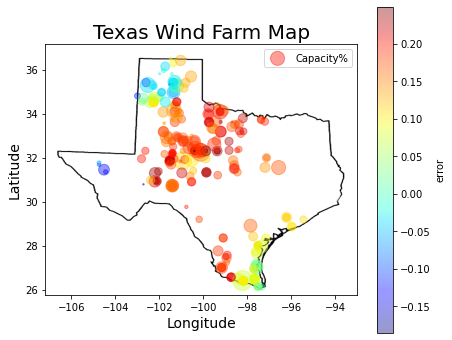

In [17]:
error_in_interval(0,6)
ax = wind_meta.plot(kind="scatter", 
                    x="longi", 
                    y="lati", 
                    alpha = 0.4 , 
                    s = wind_meta['Capacity']/3,
                    label = "Capacity%",
                    c = 'error',
                    cmap=plt.get_cmap("jet"), 
                    colorbar = True, 
                    figsize= (7,6),
                    sharex=False)

texas_map = mpimg.imread('map.gif')
plt.imshow(texas_map, extent=[-107.200, -93.000, 25.732,37.161], alpha=1)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Texas Wind Farm Map", fontsize=20)
plt.show()

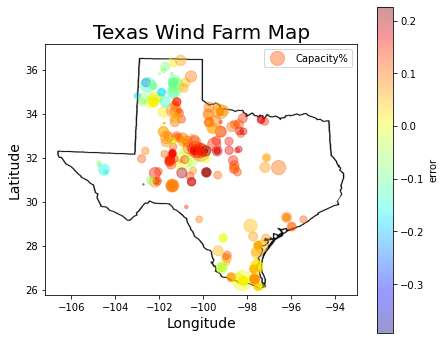

In [18]:
error_in_interval(6,12)
ax = wind_meta.plot(kind="scatter", 
                    x="longi", 
                    y="lati", 
                    alpha = 0.4 , 
                    s = wind_meta['Capacity']/3,
                    label = "Capacity%",
                    c = 'error',
                    cmap=plt.get_cmap("jet"), 
                    colorbar = True, 
                    figsize= (7,6),
                    sharex=False)

texas_map = mpimg.imread('map.gif')
plt.imshow(texas_map, extent=[-107.200, -93.000, 25.732,37.161], alpha=1)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Texas Wind Farm Map", fontsize=20)
plt.show()

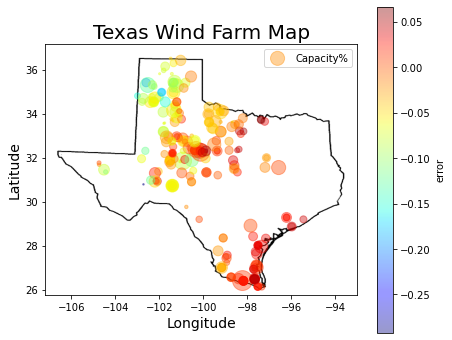

In [19]:
error_in_interval(12,18)
ax = wind_meta.plot(kind="scatter", 
                    x="longi", 
                    y="lati", 
                    alpha = 0.4 , 
                    s = wind_meta['Capacity']/3,
                    label = "Capacity%",
                    c = 'error',
                    cmap=plt.get_cmap("jet"), 
                    colorbar = True, 
                    figsize= (7,6),
                    sharex=False)

texas_map = mpimg.imread('map.gif')
plt.imshow(texas_map, extent=[-107.200, -93.000, 25.732,37.161], alpha=1)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Texas Wind Farm Map", fontsize=20)
plt.show()

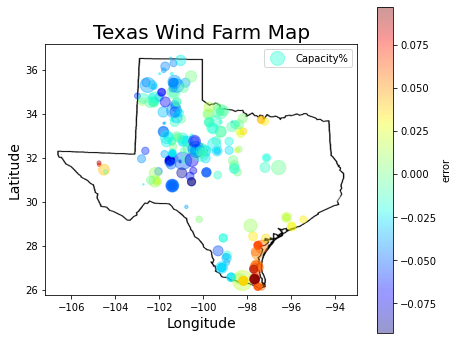

In [20]:
error_in_interval(18,24)
ax = wind_meta.plot(kind="scatter", 
                    x="longi", 
                    y="lati", 
                    alpha = 0.4 , 
                    s = wind_meta['Capacity']/3,
                    label = "Capacity%",
                    c = 'error',
                    cmap=plt.get_cmap("jet"), 
                    colorbar = True, 
                    figsize= (7,6),
                    sharex=False)

texas_map = mpimg.imread('map.gif')
plt.imshow(texas_map, extent=[-107.200, -93.000, 25.732,37.161], alpha=1)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Texas Wind Farm Map", fontsize=20)
plt.show()